### Overview of Dataset

In [2]:
import pandas as pd

#reading the downloaded spotify Data Set
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [4]:
#Getting the summary of the data types and non-nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [6]:
# Count missing values in each column
missing_values = df.isnull().sum()

# Display only columns with missing values
missing_values = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_values)

Columns with missing values:
 in_shazam_charts    50
key                 95
dtype: int64


### Basic Descriptive Statistics

In [8]:
#Getting the Mean, Median, and Standard Deviation of the 'streams' Column

#We first convert the data type of the column streams since it is in OBJECT to do this we'll use the syntax...
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

#Now we can get the Mean
mean_streams = df['streams'].mean()

#Median
median_streams = df['streams'].median()

#Mode
std_streams = df['streams'].std()

In [10]:
mean_streams

514137424.93907565

In [12]:
median_streams

290530915.0

In [14]:
std_streams

566856949.0388832

In [16]:
#Using histogram visualization will be the best option since we can view the distribution of the data and if there are any outliers

#First we import matplotlib as well as seaborn to be able to use visual plots
import matplotlib.pyplot as plt
import seaborn as sns

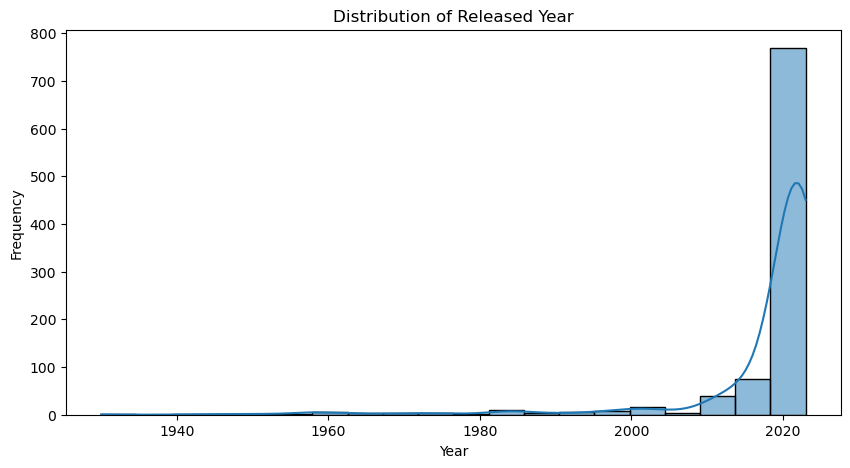

In [17]:
# Histogram for released_year
plt.figure(figsize=(10, 5))
sns.histplot(df['released_year'], bins=20, kde=True)
plt.title("Distribution of Released Year")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

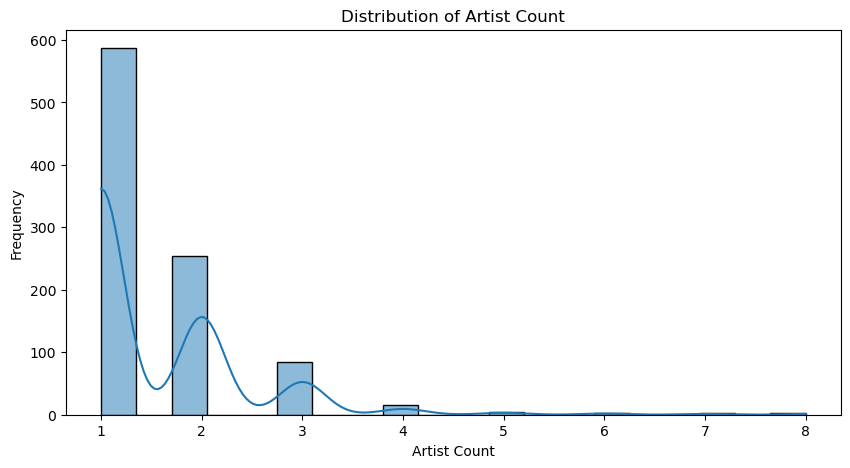

In [20]:
# Histogram for artist_count
plt.figure(figsize=(10, 5))
sns.histplot(df['artist_count'], bins=20, kde=True)
plt.title("Distribution of Artist Count")
plt.xlabel("Artist Count")
plt.ylabel("Frequency")
plt.show()

In [22]:
# Summary statistics for 'released_year' and 'artist_count'
released_year_summary = df['released_year'].describe()
artist_count_summary = df['artist_count'].describe()

In [24]:
released_year_summary

count     953.000000
mean     2018.238195
std        11.116218
min      1930.000000
25%      2020.000000
50%      2022.000000
75%      2022.000000
max      2023.000000
Name: released_year, dtype: float64

In [26]:
artist_count_summary

count    953.000000
mean       1.556139
std        0.893044
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: artist_count, dtype: float64

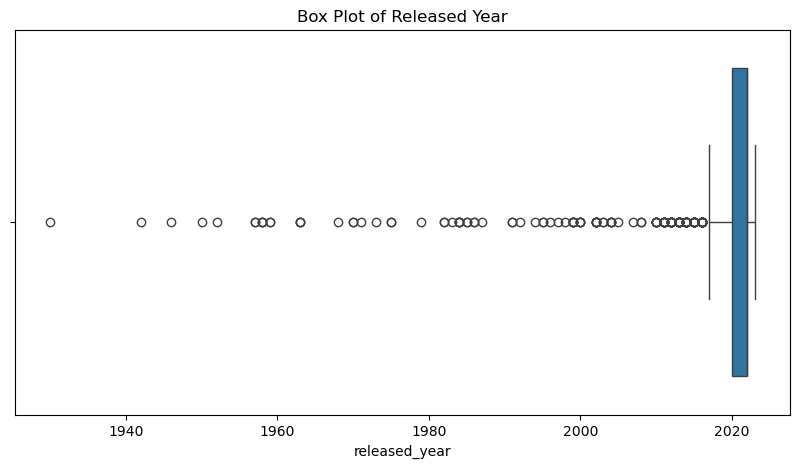

In [28]:
# Box plot for released_year
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['released_year'])
plt.title("Box Plot of Released Year")
plt.show()

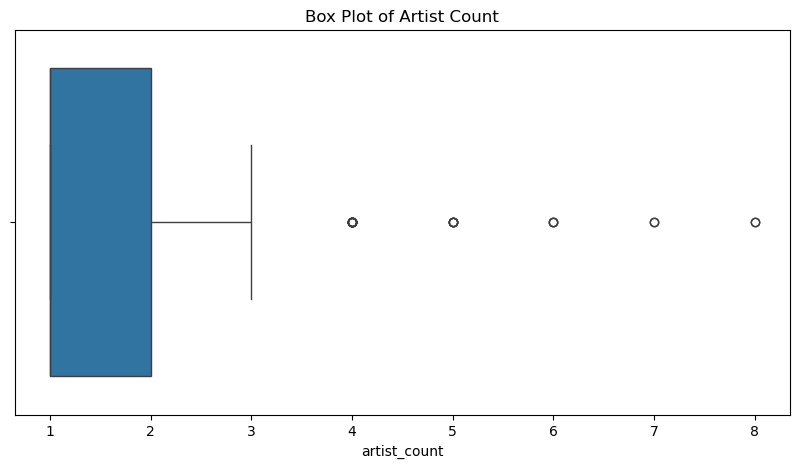

In [30]:
# Box plot for artist_count
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['artist_count'])
plt.title("Box Plot of Artist Count")
plt.show()

### Top Performers

In [32]:
#finding the top 5 streamed tracks using sorting
top_streamed_tracks = df.sort_values(by='streams', ascending=False).head(5)
top_streamed_tracks

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5


In [34]:
# Counting the number of tracks for each artist
top_artists = df['artist(s)_name'].value_counts().head(5)

# Displaying the top 5 most frequent artists and their track counts
top_artists

artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64

### Temporal Trends

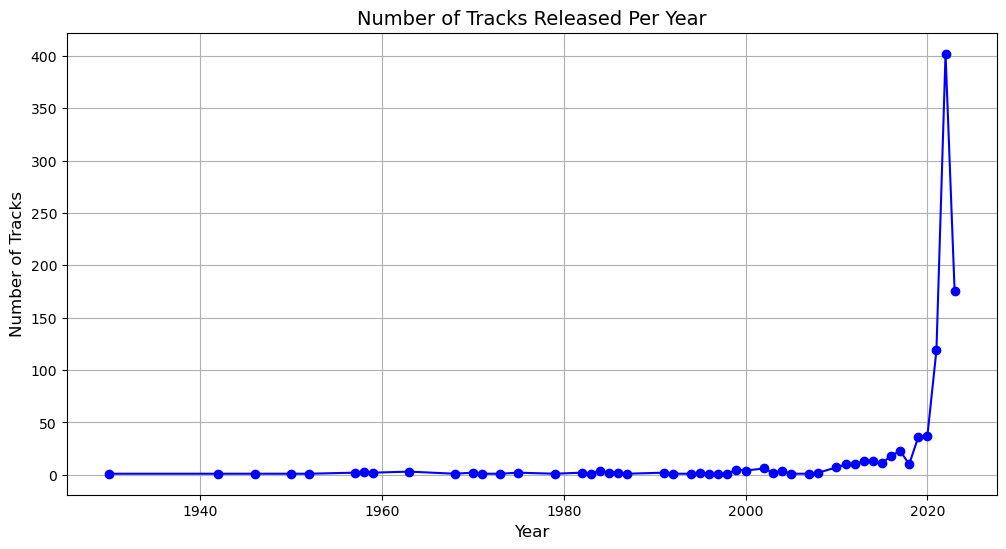

In [36]:
# Grouping the data by 'released_year' and counting the number of tracks per year
tracks_per_year = df['released_year'].value_counts().sort_index()

# Plotting the number of tracks released per year
plt.figure(figsize=(12, 6))
plt.plot(tracks_per_year.index, tracks_per_year.values, marker='o', color='b')
plt.title('Number of Tracks Released Per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.grid(visible=True)
plt.show()

In [38]:
# We count the number of tracks released for each month
tracks_per_month = df['released_month'].value_counts().sort_index()

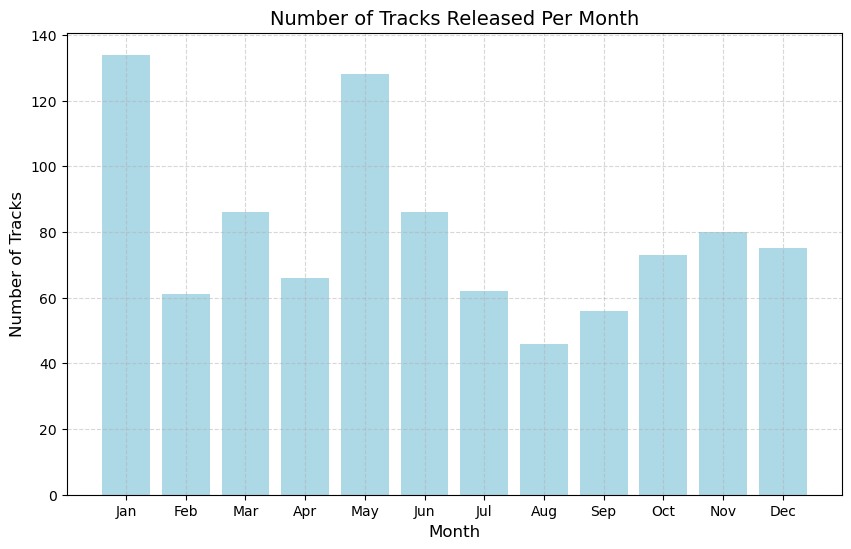

In [40]:
# Plotting the number of tracks released per month
plt.figure(figsize=(10, 6))
plt.bar(tracks_per_month.index, tracks_per_month.values, color='lightblue')
plt.title('Number of Tracks Released Per Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

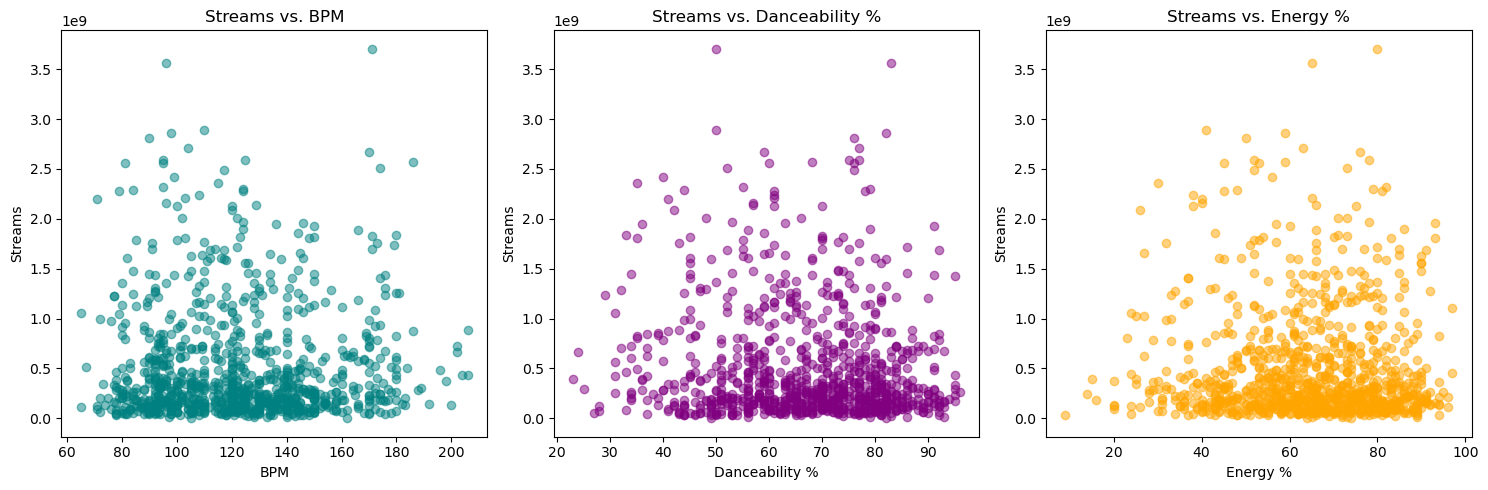

In [42]:
# Scatter plot between streams and bpm
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['bpm'], df['streams'], alpha=0.5, color='teal')
plt.title('Streams vs. BPM')
plt.xlabel('BPM')
plt.ylabel('Streams')

# Scatter plot between streams and danceability_%
plt.subplot(1, 3, 2)
plt.scatter(df['danceability_%'], df['streams'], alpha=0.5, color='purple')
plt.title('Streams vs. Danceability %')
plt.xlabel('Danceability %')
plt.ylabel('Streams')

# Scatter plot between streams and energy_%
plt.subplot(1, 3, 3)
plt.scatter(df['energy_%'], df['streams'], alpha=0.5, color='orange')
plt.title('Streams vs. Energy %')
plt.xlabel('Energy %')
plt.ylabel('Streams')

plt.tight_layout()
plt.show()

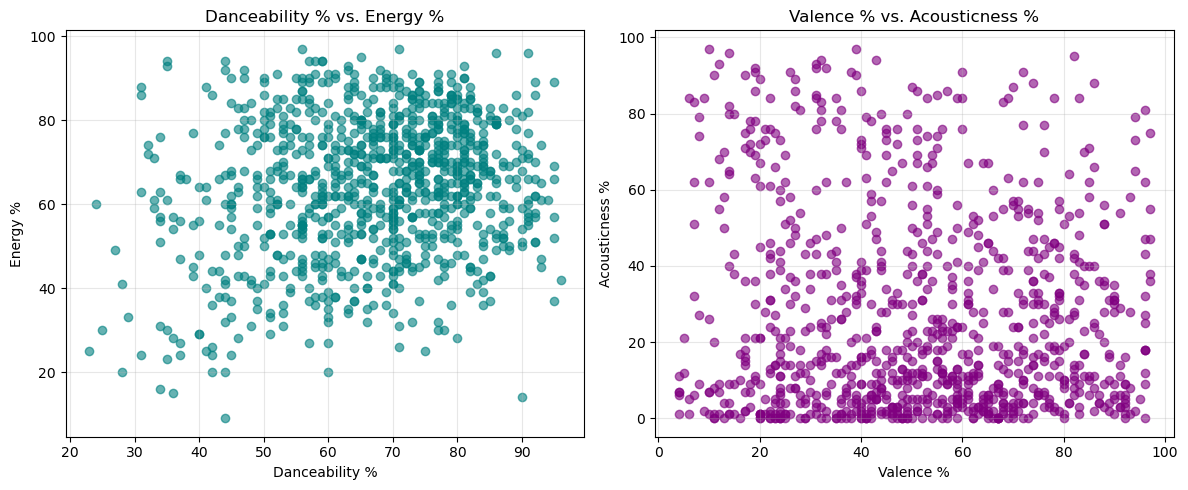

In [44]:
# Scatter plot for danceability_% and energy_%
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['danceability_%'], df['energy_%'], alpha=0.6, color='teal')
plt.title('Danceability % vs. Energy %', fontsize=12)
plt.xlabel('Danceability %', fontsize=10)
plt.ylabel('Energy %', fontsize=10)
plt.grid(visible=True, alpha=0.3)

# Scatter plot for valence_% and acousticness_%
plt.subplot(1, 2, 2)
plt.scatter(df['valence_%'], df['acousticness_%'], alpha=0.6, color='purple')
plt.title('Valence % vs. Acousticness %', fontsize=12)
plt.xlabel('Valence %', fontsize=10)
plt.ylabel('Acousticness %', fontsize=10)
plt.grid(visible=True, alpha=0.3)

plt.tight_layout()
plt.show()

In [81]:
#Filling these NaN values
df['in_deezer_playlists'] = df['in_deezer_playlists'].fillna(0)

# Convert the 'in_deezer_playlists' column to integer
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype(int)

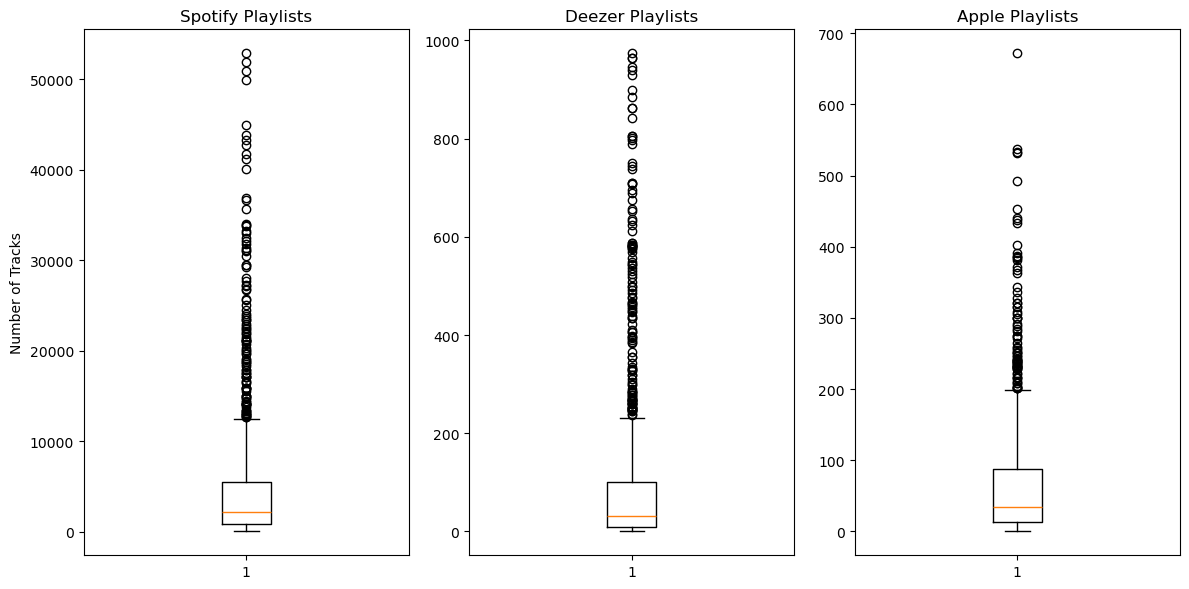

In [83]:
# Create box plots for the number of tracks in each platform's playlists
plt.figure(figsize=(12, 6))

# Box plot for Spotify playlists
plt.subplot(1, 3, 1)
plt.boxplot(df['in_spotify_playlists'])
plt.title('Spotify Playlists')
plt.ylabel('Number of Tracks')

# Box plot for Deezer playlists
plt.subplot(1, 3, 2)
plt.boxplot(df['in_deezer_playlists'])
plt.title('Deezer Playlists')

# Box plot for Apple playlists
plt.subplot(1, 3, 3)
plt.boxplot(df['in_apple_playlists'])
plt.title('Apple Playlists')

# Display the plots
plt.tight_layout()
plt.show()

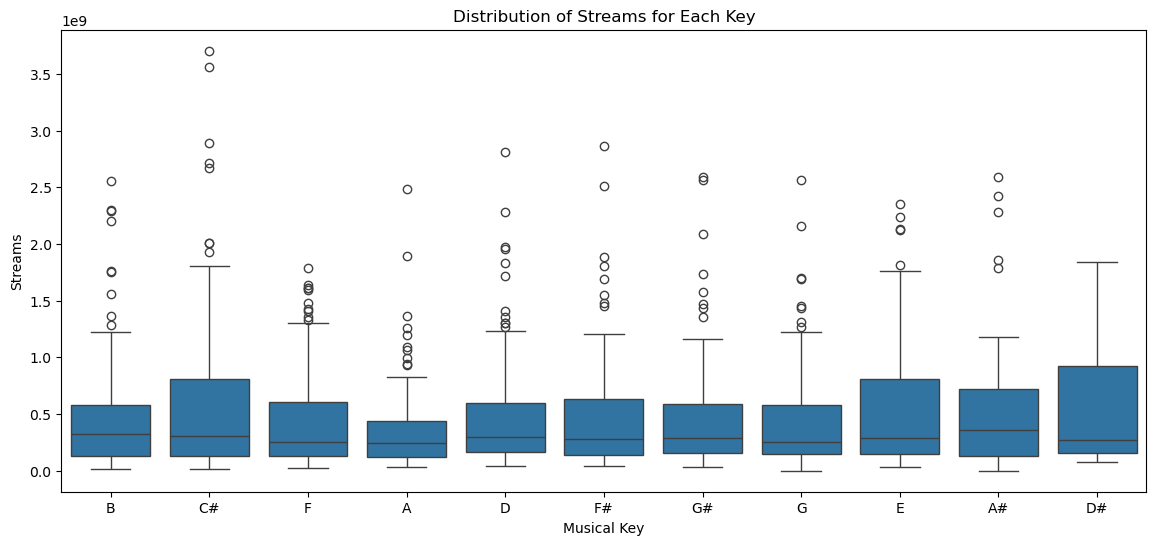

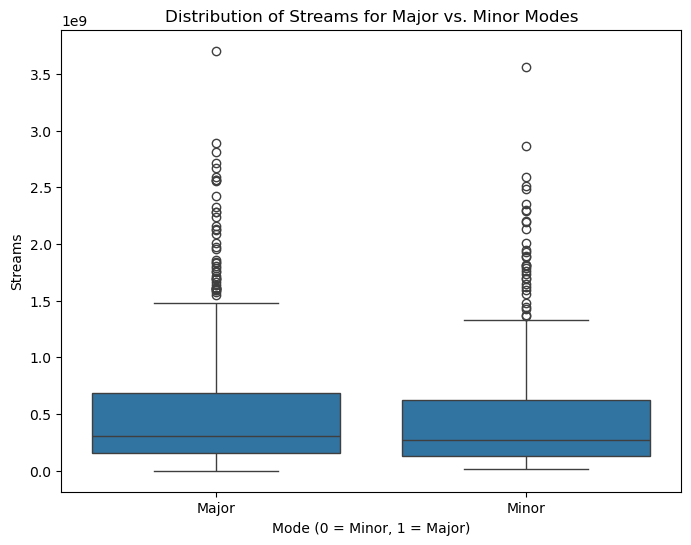

In [86]:
# Plotting the average streams for each key
plt.figure(figsize=(14, 6))
sns.boxplot(x='key', y='streams', data=df)
plt.title('Distribution of Streams for Each Key')
plt.xlabel('Musical Key')
plt.ylabel('Streams')
plt.show()

# Plotting the average streams for each mode (0 = Minor, 1 = Major)
plt.figure(figsize=(8, 6))
sns.boxplot(x='mode', y='streams', data=df)
plt.title('Distribution of Streams for Major vs. Minor Modes')
plt.xlabel('Mode (0 = Minor, 1 = Major)')
plt.ylabel('Streams')
plt.show()

In [100]:
# For Spotify
spotify_artist_counts = df.groupby('artist(s)_name')['in_spotify_playlists'].sum().sort_values(ascending=False)

# For Deezer
deezer_artist_counts = df.groupby('artist(s)_name')['in_deezer_playlists'].sum().sort_values(ascending=False)

# For Apple
apple_artist_counts = df.groupby('artist(s)_name')['in_apple_playlists'].sum().sort_values(ascending=False)

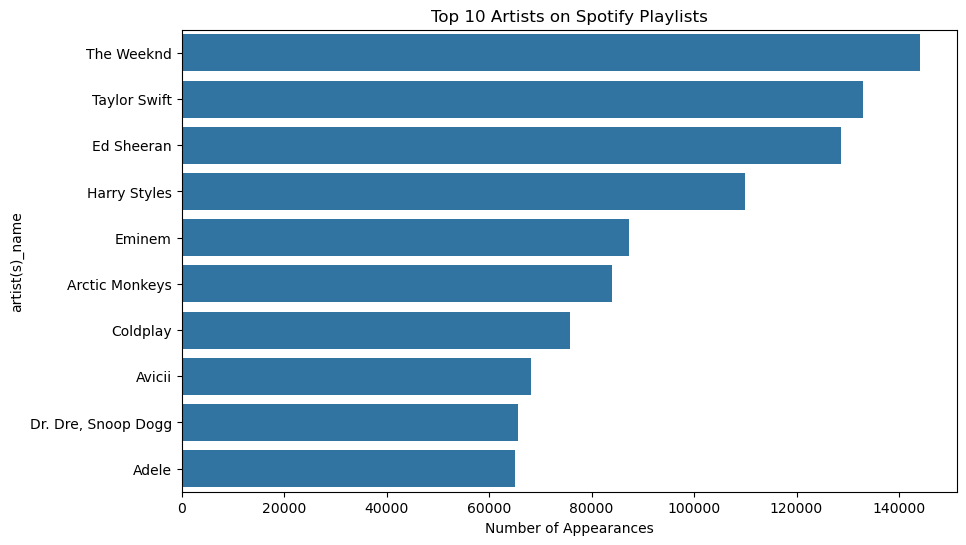

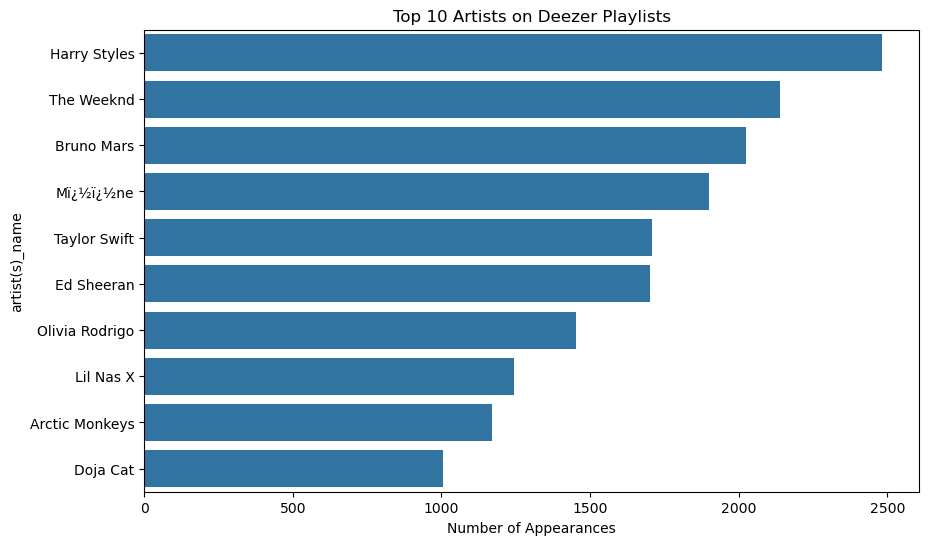

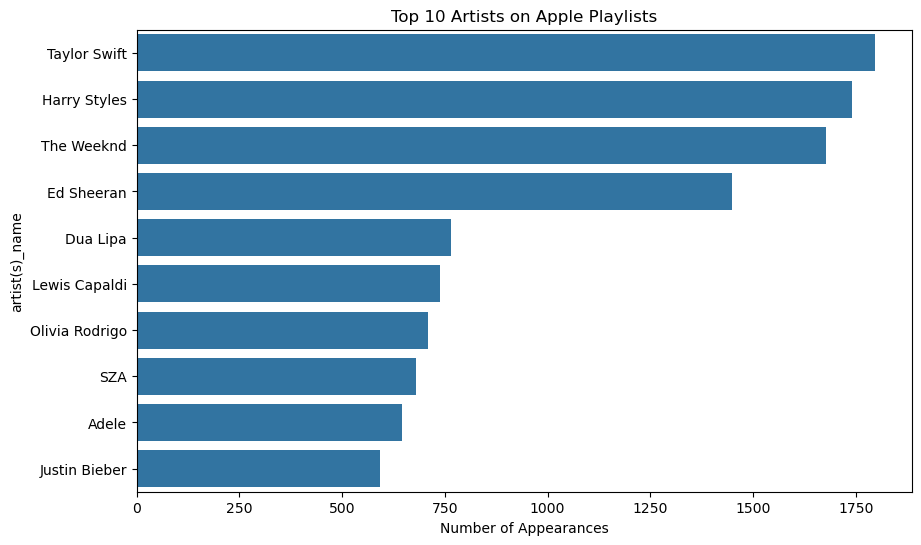

In [107]:
# Plotting Top 10 Artists for Spotify
plt.figure(figsize=(10, 6))
sns.barplot(x=spotify_artist_counts.head(10).values, y=spotify_artist_counts.head(10).index)
plt.title('Top 10 Artists on Spotify Playlists')
plt.xlabel('Number of Appearances')
plt.show()

# Plotting Top 10 Artists for Deezer
plt.figure(figsize=(10, 6))
sns.barplot(x=deezer_artist_counts.head(10).values, y=deezer_artist_counts.head(10).index)
plt.title('Top 10 Artists on Deezer Playlists')
plt.xlabel('Number of Appearances')
plt.show()

# Plotting Top 10 Artists for Apple
plt.figure(figsize=(10, 6))
sns.barplot(x=apple_artist_counts.head(10).values, y=apple_artist_counts.head(10).index)
plt.title('Top 10 Artists on Apple Playlists')
plt.xlabel('Number of Appearances')
plt.show()